Populating the interactive namespace from numpy and matplotlib
[ 2.65739076  1.97493407  2.96093622  1.70617829  3.13966024  2.9108377
  2.23117451  2.46811798  1.72081478  1.92518365  2.70294396  2.42633573
  2.67997394  0.74405917  2.17474418  1.70617829  2.23117451  2.46811798
  1.70617829  1.95806751  1.97493407  2.42633573  2.17474418  1.70617829
  2.13868249  2.21204194  2.21204194  2.15656276  2.70294396  1.95806751
  2.19323458  1.70617829  1.48145721  2.63518469  2.42633573  1.94148631
  2.40597045  2.65739076  2.88641846  2.17474418  2.9108377   2.23117451
  1.22933445  2.61334617  0.74405917  2.19323458  1.00508598  2.23117451
  2.93567357  1.46880078  1.46880078  2.44704875  2.19323458  2.70294396
  0.73767312  1.90915243  1.95806751  2.67997394  2.98663699  2.42633573
  2.70294396  2.40597045  2.42633573  1.94148631  2.70294396  1.94148631
  2.70294396  4.06857985  1.70617829  1.72081478  2.67997394  3.13966024
  0.97102189  0.98776043  1.69178862  0.73139575  1.95806751  

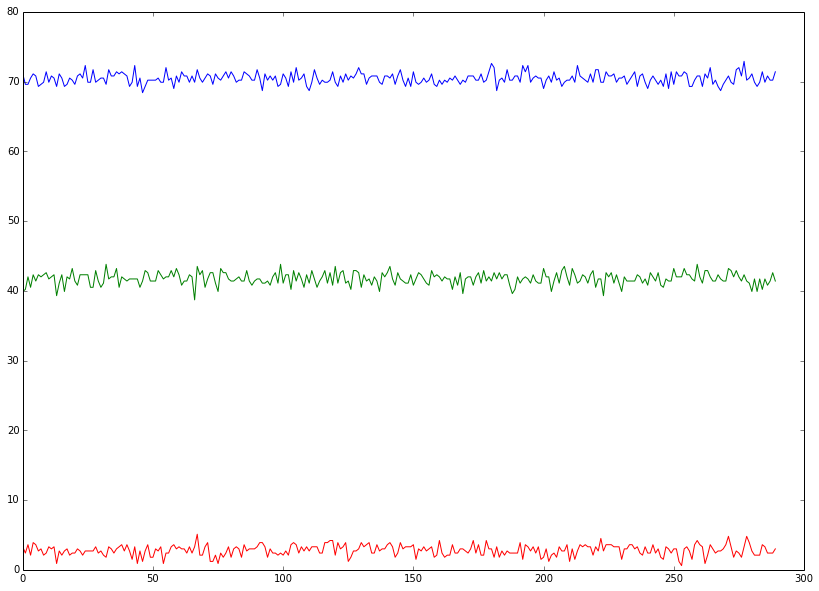

In [55]:
%pylab inline


pylab.rcParams['figure.figsize'] = (14.0, 10.0)

import numpy as np
import matplotlib.pyplot as plt

# Get the IMU signals from a file
def getSigs(fileName):
    fin = open(fileName)

    lines = fin.readlines()
    fin.close()
    
    res = []
    for str in lines:
        tmp = str.split()
        tmp = map(eval, tmp)
        res.append(tmp)

    res_array = np.array(res)
    res_array = res_array[10:, :]
    correctBias(res_array)
    
    return res_array



def correctBias(array):
    #still_array = getSigs('../data/still_normal.txt')
    
    
    # TODO, the parameters may need be adjusted when in different posture
    # The bias of gyr_x, gyr_y, gyr_z, statistics from still_normal.txt
    gyr_bias = np.array([-0.01568079, 0.02071555, 0.0186753 ])
    array[:, 3:6] = array[:, 3:6] - gyr_bias
    

def calOrientationAngle(mag_xyz):
    x = mag_xyz[:,0]
    y = mag_xyz[:,1]
    z = mag_xyz[:,2]
    
    #float azimuth = atan2(  (float)(data->magnetic.x ),(float)(data->magnetic.y) )
    azimuth = np.arctan2(x, z)*180/np.pi
    #ind = (azimuth < 0)
    #azimuth[ind] = 360 + azimuth[ind]
    #azimuth = 360 - azimuth
    
    print azimuth
    
    
    #orientation.pitch = atan2( (float)(data->magnetic.y ),(float)(data->magnetic.z)    
#)*180/PI;  
    pitch = np.arctan2(z, y)*180/np.pi
    #print pitch
    
    
    roll = np.arctan2(x, y)*180/np.pi
    #print roll
    
    plt.plot(x, 'r')
    plt.plot(y, 'g')
    plt.plot(z, 'b')
    plt.show()
    
    
if __name__=='__main__':
    dir = '../data/'
    fileName = dir + 'orientation_south.txt'
    
    res_array = getSigs(fileName)
    calOrientationAngle(res_array[:, 6:])
    